In [13]:
#IMPORTACIÓN DE LIBRERÍAS

import numpy as np
import matplotlib.pyplot as plt


In [27]:

# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5])  # Variable independiente
Y = np.array([2, 3, 5, 4, 6])  # Variable dependiente

# Cálculo del coeficiente de Pearson (r) paso a paso
def pearson_coefficient(X, Y):
    n = len(X)
    
    # Medias y desviaciones estándar
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    std_X = np.std(X, ddof=1)  # ddof=1 para muestra (n-1)
    std_Y = np.std(Y, ddof=1)
    print(f"Media X: {mean_X:.4f}")
    print(f"Media Y: {mean_Y:.4f}")
    print(f"Desviación Standard X: {std_X:.4f}")
    print(f"Desviación Standard Y: {std_X:.4f}")
    print("\n")
    
    # Cálculo de los términos estandarizados (z-scores)
    z_X = (X - mean_X) / std_X
    z_Y = (Y - mean_Y) / std_Y
    
    # Suma de productos cruzados
    sum_products = np.sum(z_X * z_Y)
    
    # Coeficiente de Pearson
    r = sum_products / (n - 1)
    
    return r

# Resultado
r = pearson_coefficient(X, Y)
print(f"Coeficiente de Pearson (r): {r:.4f}")

# Verificación con numpy (opcional)
r_numpy = np.corrcoef(X, Y)[0, 1]
print(f"Verificación con numpy: {r_numpy:.4f}")

print("\n")






Media X: 3.0000
Media Y: 4.0000
Desviación Standard X: 1.5811
Desviación Standard Y: 1.5811


Coeficiente de Pearson (r): 0.9000
Verificación con numpy: 0.9000




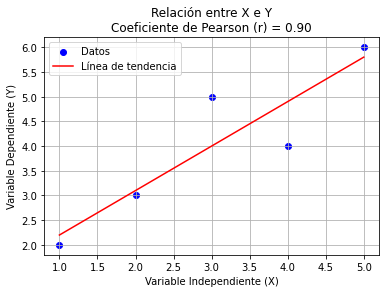

In [24]:
# Visualización
plt.scatter(X, Y, color='blue', label='Datos')
plt.title(f'Relación entre X e Y\nCoeficiente de Pearson (r) = {r:.2f}')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (Y)')

# Línea de tendencia (regresión lineal)
m, b = np.polyfit(X, Y, 1)  # Pendiente e intercepto
plt.plot(X, m * X + b, color='red', label='Línea de tendencia')

plt.legend()
plt.grid(True)
plt.savefig("pearson.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()